In [31]:
import pandas as pd
df = pd.read_csv(r'/content/AAPL, 1D 01012007-12072023.csv')
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [32]:
df.columns

Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions'],
      dtype='object')

Volume: This typically refers to the number of shares of a security traded during a given period of time (in this case, likely per day). It indicates the level of market activity for that stock within the specified time frame.

VWAP (Volume Weighted Average Price): This is the average price a stock has traded at throughout the day, weighted by the volume traded at each price level. It's a measure often used by traders and analysts to assess the average price paid for a stock, considering the volume traded at different prices.

Open: The price of the stock at the beginning of the trading period. For daily data, this would be the price at the opening of the market on that day.

Close: The price of the stock at the end of the trading period. For daily data, this would be the price at the market's closing time on that day.

High: The highest price reached by the stock during the trading day.

Low: The lowest price reached by the stock during the trading day.

Time: This column likely contains timestamps or dates corresponding to each data entry, indicating when the stock information was recorded (daily, hourly, etc.).

Transactions: This could represent the number of transactions that occurred for AAPL stock during a specific time frame. It might indicate how many trades were executed involving AAPL shares during the period corresponding to the other data in the row.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [34]:
missing_values = df.isnull().sum()
print(missing_values)

volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64


No missing values detected.

In [35]:
df.drop_duplicates(inplace=True) #drop duplicates

In [36]:
df.dtypes

volume          float64
vwap            float64
open            float64
close           float64
high            float64
low             float64
time              int64
transactions      int64
dtype: object

In [37]:
#Converting Time
import datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

In [38]:
df.dtypes #check

volume                 float64
vwap                   float64
open                   float64
close                  float64
high                   float64
low                    float64
time            datetime64[ns]
transactions             int64
dtype: object

In [39]:
df.head() #check

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578


Utilize Matplotlib to plot closing prices and traded volume over time.

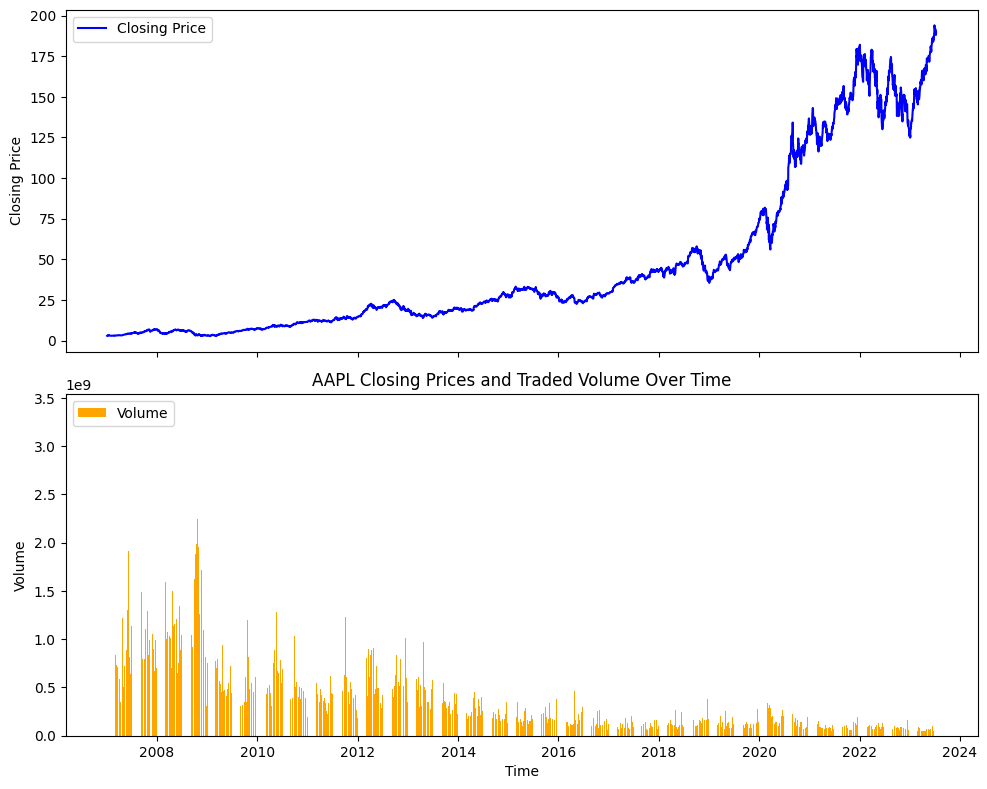

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df.set_index('time', inplace=True)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot closing prices over time
ax1.plot(df.index, df['close'], label='Closing Price', color='blue')
ax1.set_ylabel('Closing Price')
ax1.legend(loc='upper left')

# Plot traded volume over time
ax2.bar(df.index, df['volume'], label='Volume', color='orange')
ax2.set_ylabel('Volume')
ax2.legend(loc='upper left')

# Set title and display the plot
plt.title('AAPL Closing Prices and Traded Volume Over Time')
plt.xlabel('Time')
plt.tight_layout()
plt.show()


This plot is showing the AAPL closing prices over time. We can observe how the closing time is grow up during the years.

What about volume, we can observe the pic in 2009 year. Now it is decreasing over the years. It indicates the level of market activity for that stock is decreasing over the time.


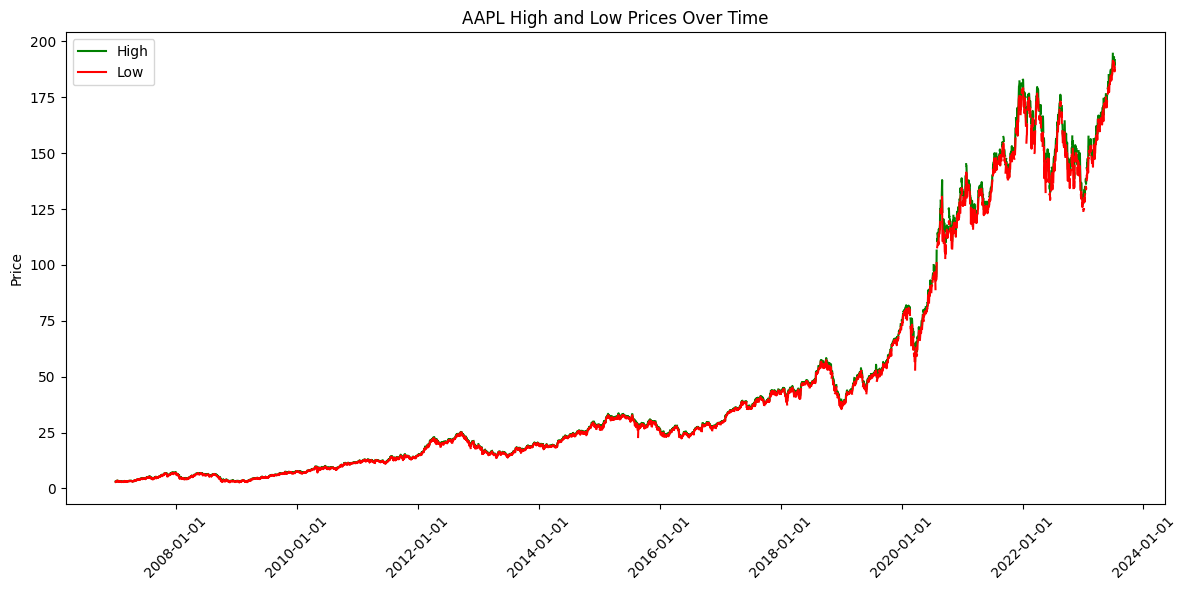

In [46]:
import matplotlib.dates as mdates

# Resample data to a frequency suitable for candlestick chart
df_resampled = df.resample('D').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last'})

# Reset index to use 'time' as a column
df_resampled.reset_index(inplace=True)

# Convert 'time' to matplotlib dates using mdates.date2num
df_resampled['time'] = df_resampled['time'].apply(lambda x: mdates.date2num(x))

# Create a figure and subplot for the candlestick chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot candlestick chart
ax.plot(df_resampled['time'], df_resampled['high'], linestyle='-', color='green', label='High')
ax.plot(df_resampled['time'], df_resampled['low'], linestyle='-', color='red', label='Low')
ax.legend()
ax.set_ylabel('Price')
ax.set_title('AAPL High and Low Prices Over Time')
ax.xaxis_date()
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Statistical Analysis

In [48]:
summary_stats = df[['close', 'volume', 'high', 'low']].describe()
print(summary_stats)

             close        volume         high          low
count  4159.000000  4.159000e+03  4159.000000  4159.000000
mean     46.396058  3.662925e+08    46.881127    45.865790
std      50.293482  3.724793e+08    50.843874    49.680104
min       2.792900  2.422234e+07     2.928600     2.792900
25%      11.947150  1.067497e+08    12.028400    11.853600
50%      25.825000  2.136463e+08    26.262800    25.680000
75%      52.231250  4.965321e+08    52.626250    51.796250
max     193.970000  3.373042e+09   194.480000   191.760000


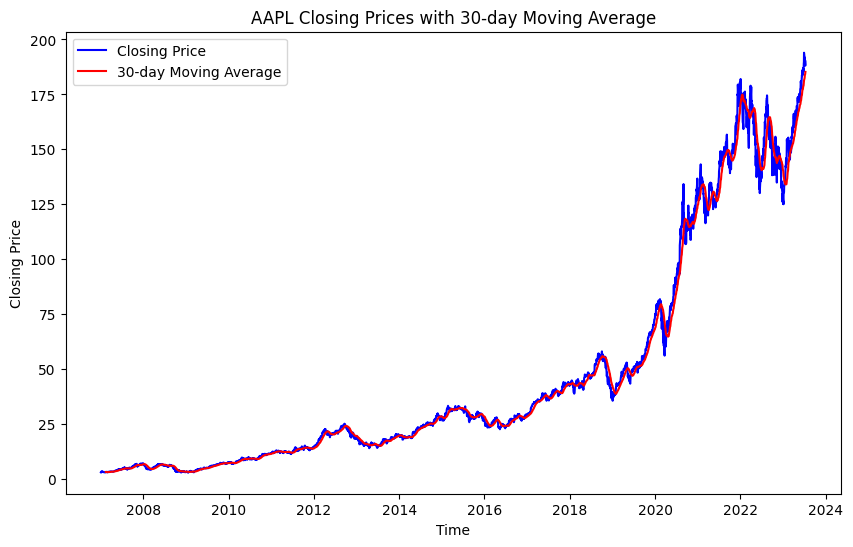

In [50]:
# Calculate the 30-day moving average for closing prices
df['30_day_MA'] = df['close'].rolling(window=30).mean()

# Plot the closing prices and the 30-day moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='Closing Price', color='blue')
plt.plot(df.index, df['30_day_MA'], label='30-day Moving Average', color='red')
plt.title('AAPL Closing Prices with 30-day Moving Average')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


Hypothesis Testing

In [59]:
from scipy.stats import ttest_ind
df['Year'] = df.index.year

closing_2022 = df[df['Year'] == 2022]['close']
closing_2023 = df[df['Year'] == 2023]['close']

result = ttest_ind(closing_2022, closing_2023)
print("T-test result for average closing prices in 2022 and 2023:")
print(f"T-statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

T-test result for average closing prices in 2022 and 2023:
T-statistic: -4.864232434086166
P-value: 1.685936837260292e-06



The t-test results indicate a statistically significant difference in the average closing prices between the years 2022 and 2023.

T-Statistic: The t-statistic measures the difference between the means of the two groups relative to the variation within the groups. In this case, the t-statistic is -4.864, indicating a considerable difference between the average closing prices of 2022 and 2023.

P-Value: The p-value is a measure of evidence against a null hypothesis. A small p-value (in this case, 1.685936837260292e-06, which is close to zero) suggests strong evidence against the null hypothesis. Here, it indicates that the observed difference in average closing prices between 2022 and 2023 is unlikely to be due to random chance alone.

In summary, based on these results, it appears that there is a significant difference in the average closing prices between the years 2022 and 2023 for the dataset.

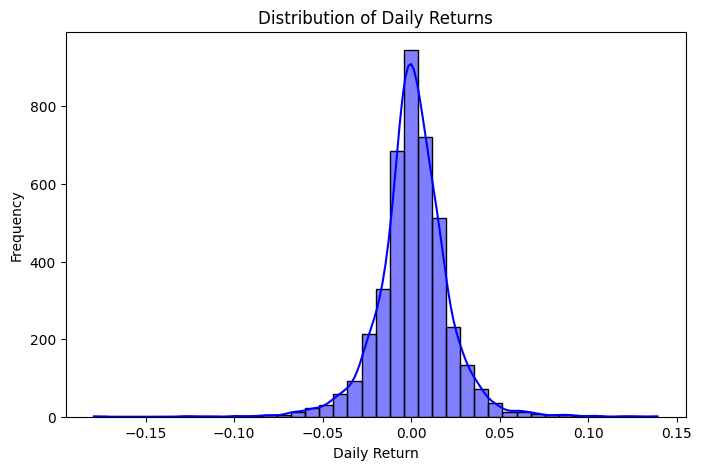

Shapiro-Wilk normality test:
Test statistic: nan
P-value: 1.0


In [62]:
#Examine daily returns’ distribution and test for normality using SciPy.

import seaborn as sns
from scipy.stats import shapiro

# Calculate daily returns
df['Daily_Return'] = df['close'].pct_change().dropna()


plt.figure(figsize=(8, 5))
sns.histplot(df['Daily_Return'], kde=True, bins=40, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Test for normality using Shapiro-Wilk test
normality_test = shapiro(df['Daily_Return'])
print("Shapiro-Wilk normality test:")
print(f"Test statistic: {normality_test.statistic}")
print(f"P-value: {normality_test.pvalue}")


We have a result nan in test statistic, this could be some problem in data. Now I'will explore it.

In [63]:
df['Daily_Return'].value_counts

<bound method IndexOpsMixin.value_counts of time
2007-01-03 05:00:00         NaN
2007-01-04 05:00:00    0.022186
2007-01-05 05:00:00   -0.007126
2007-01-08 05:00:00    0.004938
2007-01-09 05:00:00    0.083079
                         ...   
2023-07-06 04:00:00    0.004820
2023-07-07 04:00:00   -0.005891
2023-07-10 04:00:00   -0.010856
2023-07-11 04:00:00   -0.002810
2023-07-12 04:00:00    0.010261
Name: Daily_Return, Length: 4159, dtype: float64>

We can see NaN value, so we have to impute NaN values with the mean.

In [64]:
mean_daily_return = df['Daily_Return'].mean()
df['Daily_Return'].fillna(mean_daily_return, inplace=True)

In [66]:
df['Daily_Return'].value_counts #check

<bound method IndexOpsMixin.value_counts of time
2007-01-03 05:00:00    0.001203
2007-01-04 05:00:00    0.022186
2007-01-05 05:00:00   -0.007126
2007-01-08 05:00:00    0.004938
2007-01-09 05:00:00    0.083079
                         ...   
2023-07-06 04:00:00    0.004820
2023-07-07 04:00:00   -0.005891
2023-07-10 04:00:00   -0.010856
2023-07-11 04:00:00   -0.002810
2023-07-12 04:00:00    0.010261
Name: Daily_Return, Length: 4159, dtype: float64>

In [65]:
# Test for normality using Shapiro-Wilk test one more time
normality_test = shapiro(df['Daily_Return'])
print("Shapiro-Wilk normality test:")
print(f"Test statistic: {normality_test.statistic}")
print(f"P-value: {normality_test.pvalue}")

Shapiro-Wilk normality test:
Test statistic: 0.9406322240829468
P-value: 6.011836098142301e-38


In the Shapiro-Wilk normality test:

Test Statistic: The test statistic is a value used to assess how well the sample data's distribution fits a normal distribution. For the Shapiro-Wilk test, the test statistic ranges between 0 and 1, where values closer to 1 indicate a closer fit to a normal distribution. Here, the test statistic is 0.941, indicating that the data might be reasonably close to a normal distribution.

P-value: The p-value measures the strength of evidence against the null hypothesis. In this case, the extremely small p-value (6.011836098142301e-38, essentially 0) suggests strong evidence against the null hypothesis that the data is normally distributed. A very low p-value typically indicates that the data significantly deviates from a normal distribution.

In summary, while the test statistic (0.941) suggests some level of normality, the very small p-value indicates strong evidence against the assumption that the data follows a normal distribution. Therefore, based on the Shapiro-Wilk test, the data likely does not follow a normal distribution.

Advanced Statistical Techniques

Calculating Moving Averages:

In [67]:
import numpy as np

# Calculate the moving averages for 'close' prices and 'volume'
window_size = 30

moving_average_close = np.convolve(df['close'], np.ones(window_size) / window_size, mode='valid')
moving_average_volume = np.convolve(df['volume'], np.ones(window_size) / window_size, mode='valid')



Exploring Correlations:

In [68]:
# Calculate correlation coefficient between moving averages of closing prices and trading volume
correlation = np.corrcoef(moving_average_close, moving_average_volume)[0, 1]

print(f"Correlation coefficient between moving averages of closing prices and trading volume: {correlation}")


Correlation coefficient between moving averages of closing prices and trading volume: -0.5813965546855486


A correlation coefficient of approximately -0.581 suggests a moderate negative relationship between the moving averages of closing prices and trading volume.

While the correlation isn't extremely strong, the negative correlation coefficient suggests that there's a tendency for the moving averages of closing prices to move in the opposite direction compared to trading volume over the specified time periods.

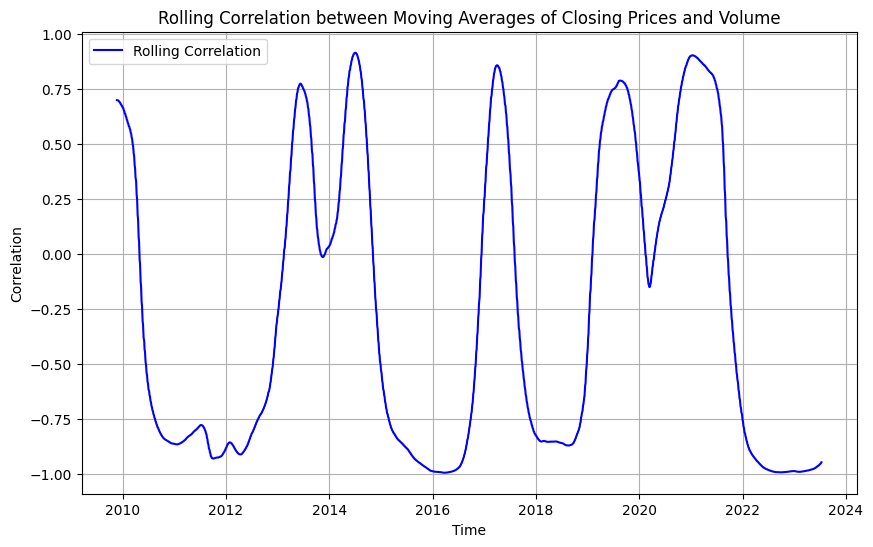

In [71]:
window_size = 365
df['MA_Close'] = df['close'].rolling(window=window_size).mean()
df['MA_Volume'] = df['volume'].rolling(window=window_size).mean()

# Calculate rolling correlations between moving averages
rolling_corr = df['MA_Close'].rolling(window=window_size).corr(df['MA_Volume'])

# Plot the rolling correlations
plt.figure(figsize=(10, 6))
plt.plot(rolling_corr, label='Rolling Correlation', color='blue')
plt.title('Rolling Correlation between Moving Averages of Closing Prices and Volume')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()


We can observe how the correlation has changed over the years. We can see that the correlation between moving averages is not stable: the relationship was both strong and weak, positive and negative across different time.


Summary of Insights:

Correlation Analysis: Utilizing NumPy's statistical functions, correlations between moving averages of closing prices and trading volume were explored. The analysis revealed a moderate negative correlation (-0.58) between these metrics. This suggests that, on average, periods with higher closing prices tend to coincide with lower trading volumes and vice versa.

Moving Averages: Moving averages were calculated to smooth out fluctuations and identify trends over a specific window (e.g., 30 days). This technique provided insights into short-term price trends and trading activity patterns.

Temporal Trends: The analysis focused on short-term trends across time periods, showcasing how correlations evolve within the defined window size. Further investigation using larger windows or aggregated timeframes could unveil longer-term trends and correlations.

Visualization: Visual representations, such as plots showcasing moving averages and correlation coefficients, were employed to communicate insights effectively. Text annotations were utilized to emphasize key statistical measures on the visualizations.

Reflection:

Challenges Faced:

Window Size Selection: Determining the appropriate window size for moving averages involved a trade-off. Smaller windows captured short-term fluctuations but might overlook long-term trends, while larger windows smoothed out data but might obscure rapid changes.

Data Granularity: Analyzing correlations 'across time periods' might require balancing granularity. Aggregated or resampled data could provide insights into longer-term trends but may lose granularity essential for short-term analyses.

Solutions Implemented:

Experimentation with Window Sizes: Considering various window sizes (we checked 30 and 365 days) allowed for insights at different temporal granularities, revealing both short-term fluctuations and longer-term trends.

Data Resampling: For comprehensive insights 'across time periods,' resampling or aggregation of data into larger intervals (monthly or yearly) facilitated the exploration of correlations over longer timeframes.

Communication through Visualization: Utilizing visualizations with annotations helped convey complex statistical insights in an understandable format, aiding in the clear communication of findings.

In conclusion, the advanced statistical analyses employing moving averages, correlations, and the exploration of temporal trends provided valuable insights into the relationship between closing prices and trading volume. Addressing challenges with thoughtful parameter selection and analytical approaches significantly contributed to the depth and breadth of the analysis.